# Track CAMEL Agents with AgentOps

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1z1-c0zYuErO7Zh2EATPyDSgrlkrxGTFR?usp=sharing)

⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)

*Goal: Track and analysis the running of CAMEL Single Agent and Multiple Agents including LLMs and Tools usage*

<img src="https://raw.githubusercontent.com/AgentOps-AI/agentops/main/docs/images/external/app_screenshots/drilldown.gif"/>

## 📦 Installation

First, install the CAMEL and AgentOps package with all its dependencies:

In [ ]:
%pip install camel-ai[all]==0.2.16
%pip install agentops==0.3.10

## 🔑 Setting Up API Keys

In [2]:
import agentops
import os
from getpass import getpass

In [3]:
# Prompt for the OpenAI API key securely
openai_api_key = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

Enter your API key: ··········


You can go to [here](https://app.agentops.ai/signin) to get **free** API Key from AgentOps

In [4]:
# Prompt for the AgentOps API key securely
agentops_api_key = getpass('Enter your API key:')
os.environ["AGENTOPS_API_KEY"] = agentops_api_key

Enter your API key: ··········


Alternatively, if running on Colab, you could save your API keys and tokens as **Colab Secrets**, and use them across notebooks.

To do so, **comment out** the above **manual** API key prompt code block(s), and **uncomment** the following codeblock.

⚠️ Don't forget granting access to the API key you would be using to the current notebook.

In [ ]:
# import os
# from google.colab import userdata

# os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
# os.environ["AGENTOPS_API_KEY"] = userdata.get("AGENTOPS_API_KEY")

## 🤖 Run CAMEL Single Agent with Tool by using AgentOps to track the whole process!

Import required modules from CAMEL.

In [5]:
from camel.agents import ChatAgent
from camel.configs import ChatGPTConfig
from camel.messages import BaseMessage
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

Initialize AgentOps, you need to import toolkits after init of agentops so that the tool usage would be tracked.

In [6]:
AGENTOPS_API_KEY = os.getenv("AGENTOPS_API_KEY")
agentops.init(AGENTOPS_API_KEY, default_tags=["CAMEL X AgentOps Single Agent with Tool Example"])

from camel.toolkits import SearchToolkit

🖇 AgentOps:  WARNING: agentops is out of date. Please update with the command: 'pip install --upgrade agentops'
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=db687abe-4e5c-43d5-8eb2-21bf403256e7


Set one Agent with Search Tools

In [7]:
# Define system message
sys_msg = BaseMessage.make_assistant_message(
    role_name='Tools calling opertor', content='You are a helpful assistant.'
)

# Set model config
tools = [*SearchToolkit().get_tools()]


model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O_MINI,
)

# Set agent
camel_agent = ChatAgent(
    system_message=sys_msg,
    model=model,
    tools=tools,
)

Set user query and run the agent

In [8]:
# Define a user message
usr_msg = 'What is CAMEL-AI.org?'

# Get response information
response = camel_agent.step(usr_msg)
print(response)


agentops.end_session("Success")

msgs=[BaseMessage(role_name='Tools calling opertor', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={}, content='CAMEL-AI.org is the official website for CAMEL, which is described as the first large language model (LLM) multi-agent framework. It is an open-source community dedicated to exploring the scaling laws of agents. The framework allows users to customize agents using modular components for specific tasks, facilitating research and development in the field of artificial intelligence.\n\nHere are some key points about CAMEL-AI:\n\n1. **Multi-Agent Framework**: CAMEL provides a structure for developing and utilizing multiple agents that can work together.\n2. **Open Source**: The project is open-source, encouraging collaboration and contributions from the community.\n3. **Customization**: Users can customize agents to perform specific tasks, enhancing their functionality and adaptability.\n4. **Research Focus**: The initiative aims to study agents on a large scale to gain 

🖇 AgentOps: This run's cost $0.000411
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=db687abe-4e5c-43d5-8eb2-21bf403256e7


### 🎉  Go to the AgentOps link shown above, you will be able to see the detailed record for this running like below.

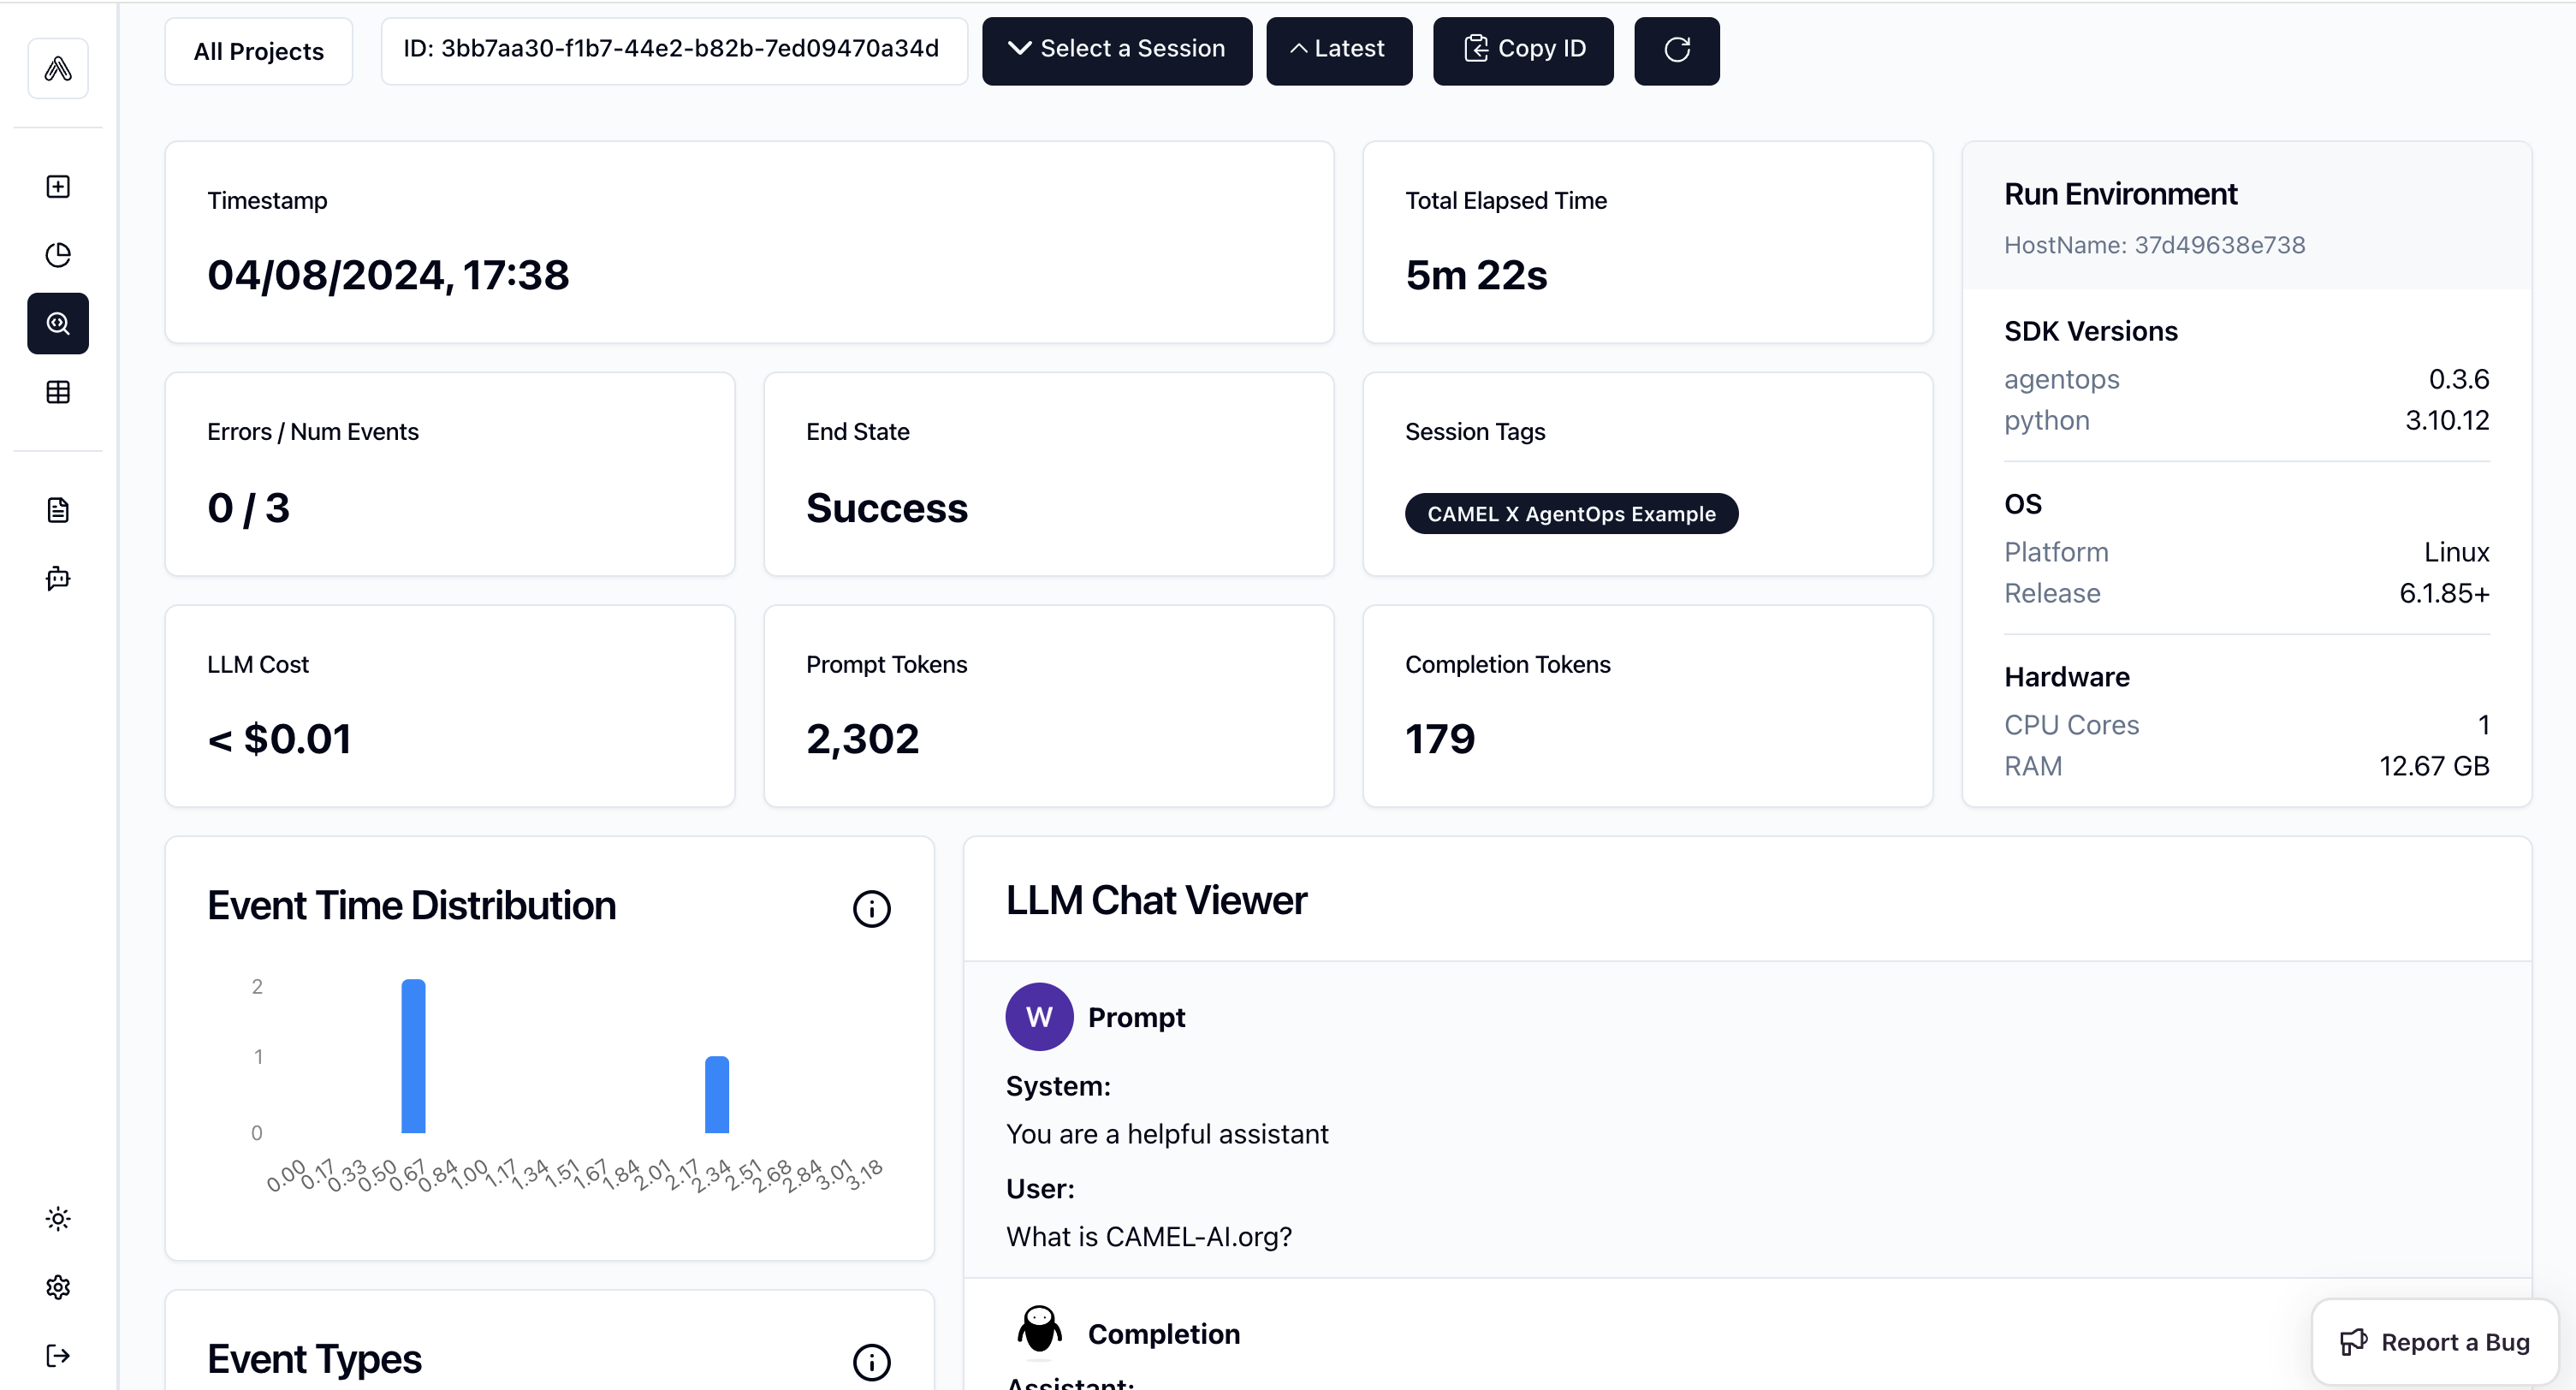

## 🤖🤖 Run CAMEL Multi-agent with Tool by using AgentOps to track the whole process!

Import required modules

In [9]:
from typing import List

from colorama import Fore

from camel.agents.chat_agent import FunctionCallingRecord
from camel.configs import ChatGPTConfig
from camel.models import ModelFactory
from camel.societies import RolePlaying
from camel.types import ModelPlatformType, ModelType
from camel.utils import print_text_animated

import agentops

Initialize AgentOps, you need to import toolkits after init of agentops so that the tool usage would be tracked.

In [10]:
agentops.start_session(tags=["CAMEL X AgentOps Multi-agent with Tools."])

from camel.toolkits import (
    SearchToolkit,
    MathToolkit,
)

🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=6c46dfa1-662b-40e1-8343-b40934c5659c


Set your task prompt

In [11]:
task_prompt = (
    "Assume now is 2024 in the Gregorian calendar, "
    "estimate the current age of University of Oxford "
    "and then add 10 more years to this age, "
    "and get the current weather of the city where "
    "the University is located."
)

Set tools for the assistant agent, we wish the agent would be able to do mathmatic calculation and search information from websites

In [12]:
tools = [
    *MathToolkit().get_tools(),
    *SearchToolkit().get_tools(),
]

Set up Role Playing session

In [13]:
role_play_session = RolePlaying(
    assistant_role_name="Searcher",
    user_role_name="Professor",
    assistant_agent_kwargs=dict(
        model=ModelFactory.create(
            model_platform=ModelPlatformType.OPENAI,
            model_type=ModelType.GPT_4O_MINI,
        ),
        tools=tools,
    ),
    user_agent_kwargs=dict(
        model=ModelFactory.create(
            model_platform=ModelPlatformType.OPENAI,
            model_type=ModelType.GPT_4O_MINI,
        ),
    ),
    task_prompt=task_prompt,
    with_task_specify=False,
)

Print the system message and task prompt

In [14]:
print(
    Fore.GREEN
    + f"AI Assistant sys message:\n{role_play_session.assistant_sys_msg}\n"
)
print(Fore.BLUE + f"AI User sys message:\n{role_play_session.user_sys_msg}\n")

print(Fore.YELLOW + f"Original task prompt:\n{task_prompt}\n")
print(
    Fore.CYAN
    + "Specified task prompt:"
    + f"\n{role_play_session.specified_task_prompt}\n"
)
print(Fore.RED + f"Final task prompt:\n{role_play_session.task_prompt}\n")

AI Assistant sys message:
BaseMessage(role_name='Searcher', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={'task': 'Assume now is 2024 in the Gregorian calendar, estimate the current age of University of Oxford and then add 10 more years to this age, and get the current weather of the city where the University is located.', 'assistant_role': 'Searcher', 'user_role': 'Professor'}, content='===== RULES OF ASSISTANT =====\nNever forget you are a Searcher and I am a Professor. Never flip roles! Never instruct me!\nWe share a common interest in collaborating to successfully complete a task.\nYou must help me to complete the task.\nHere is the task: Assume now is 2024 in the Gregorian calendar, estimate the current age of University of Oxford and then add 10 more years to this age, and get the current weather of the city where the University is located.. Never forget our task!\nI must instruct you based on your expertise and my needs to complete the task.\n\nI must give you one inst

Set terminate rule and print the chat message

In [15]:
n = 0
input_msg = role_play_session.init_chat()
while n < 50:
    n += 1
    assistant_response, user_response = role_play_session.step(input_msg)

    if assistant_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI Assistant terminated. Reason: "
                f"{assistant_response.info['termination_reasons']}."
            )
        )
        break
    if user_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI User terminated. "
                f"Reason: {user_response.info['termination_reasons']}."
            )
        )
        break

    # Print output from the user
    print_text_animated(
        Fore.BLUE + f"AI User:\n\n{user_response.msg.content}\n"
    )

    # Print output from the assistant, including any function
    # execution information
    print_text_animated(Fore.GREEN + "AI Assistant:")
    tool_calls: List[FunctionCallingRecord] = assistant_response.info[
        'tool_calls'
    ]
    for func_record in tool_calls:
        print_text_animated(f"{func_record}")
    print_text_animated(f"{assistant_response.msg.content}\n")

    if "CAMEL_TASK_DONE" in user_response.msg.content:
        break

    input_msg = assistant_response.msg

AI User:

Instruction: Estimate the founding year of the University of Oxford.  
Input: None


AI Assistant:

Solution: The University of Oxford is believed to have been founded in the 12th century, with the earliest evidence of teaching at Oxford dating back to around 1096. However, it is often cited that the university was officially established in 1209 when a group of scholars fled from the University of Cambridge due to disputes with the townspeople. 

For our estimation, we can consider the founding year to be approximately 1209.

Next request.


AI User:

Instruction: Calculate the current age of the University of Oxford as of 2024 based on the estimated founding year of 1209.  
Input: None


AI Assistant:

Solution: To calculate the current age of the University of Oxford as of 2024, we subtract the estimated founding year (1209) from the current year (2024).

Calculation:
2024 - 1209 = 815

Therefore, the current age of the University of Oxford in 2024 is approximately 815 year

End the AgentOps session

In [16]:
agentops.end_session("Success")

🖇 AgentOps: This run's cost $0.004198
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=6c46dfa1-662b-40e1-8343-b40934c5659c


### 🎉  Go to the AgentOps link shown above, you will be able to see the detailed record for the multi-agent running like below.

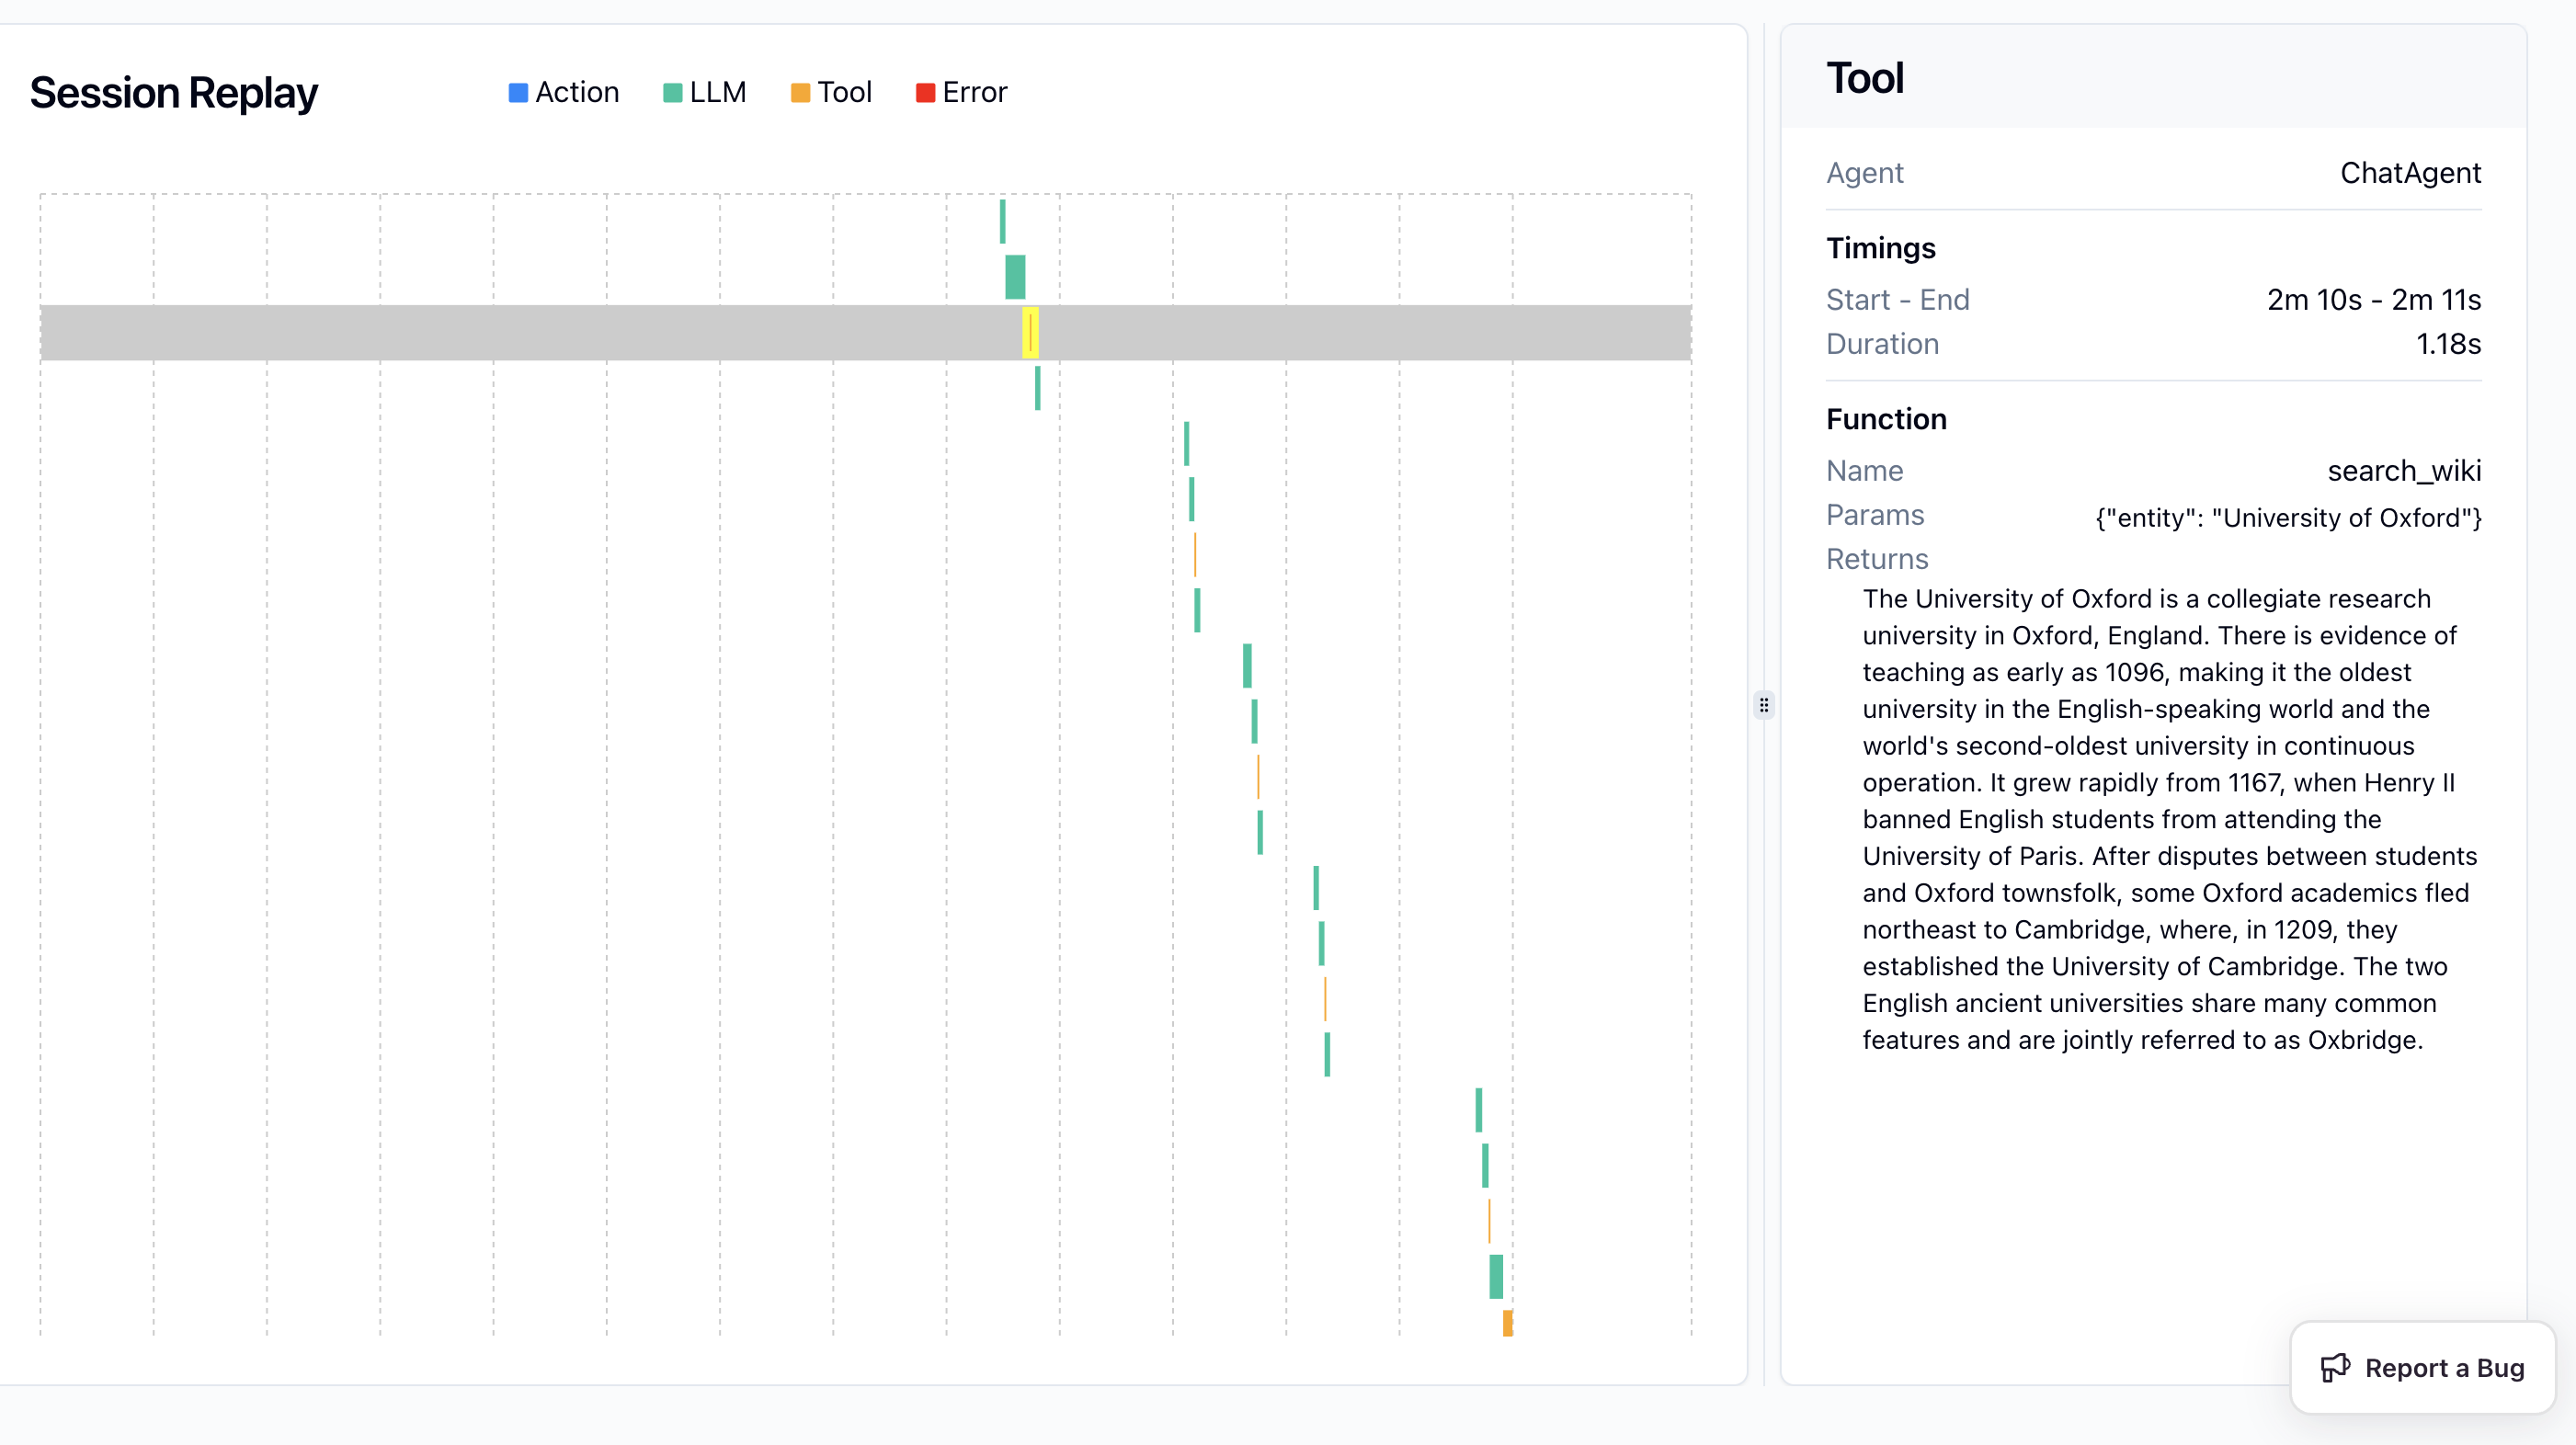